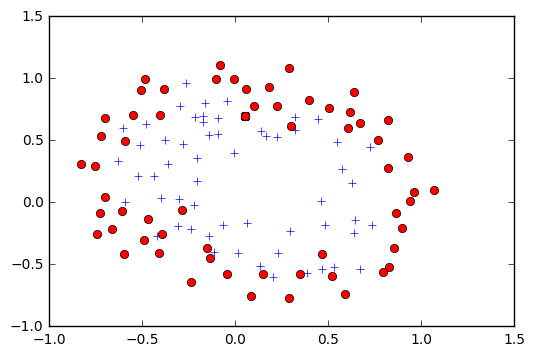

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import math

# Load data from ascii file
x = np.genfromtxt('ex5/ex5Logx.dat', delimiter=',')
y = np.genfromtxt('ex5/ex5Logy.dat')
y = np.expand_dims(y, axis=1)

pos = np.where(y==1)
neg = np.where(y==0)

# Plot the training data
plt.plot(x[pos, 0], x[pos, 1], 'b+')
plt.plot(x[neg, 0], x[neg, 1], 'ro')
plt.show()

# print x
arr = x[:,0] ** 2
arr = np.expand_dims(arr, axis=1)

In [106]:
def map_feature(f1, f2):
    out = np.ones((np.size(f1), 1))
    for i in range(1,7):
        for j in range(0,i+1):
            xc = np.expand_dims( (f1 ** (i-j)) * (f2 ** j), axis=1 )
            out = np.hstack((out, xc ))
    return out

x = map_feature(x[:,0], x[:,1])
(m, n) = np.shape(x)

theta = np.zeros(n)
theta = np.expand_dims(theta, axis=1)
np.shape(theta)

(28, 1)

In [107]:
sigmoid = lambda a: 1 / (1 + math.exp(-a))

# Vectorize sigmoid so it can operate on whole matrix
vecsig = np.vectorize(sigmoid)

max_itr = 15
j = np.zeros(max_itr)

lmbda = 0

for i in range(max_itr):
    # Calculate the hypothesis function
    z = x.dot(theta)
    h = vecsig(z)
    h = np.array(h)

    g = (lmbda / m) * (theta)
    g[1] = 0
    l = (lmbda / m) * (np.eye(n))
    l[1] = 0
    
    # Calculate the gradient and hessian
    # The implementation below is equivalent to the summation formulas
    grad = ( x.transpose().dot(h - y) / m ) + g
    hes = ( x.transpose().dot( np.diag(h[:,0]) ).dot( np.diag(1 - h[:,0]) ).dot(x) / m ) + l
    
    
    # Update theta
    theta = theta - np.linalg.lstsq(hes, grad)[0]
    
print theta

[[   26.78199709]
 [   20.08445532]
 [   68.34254602]
 [ -319.82003964]
 [ -151.49181011]
 [ -107.10926645]
 [ -133.2614877 ]
 [ -479.48631125]
 [ -399.36464784]
 [ -365.86768314]
 [ 1312.02163901]
 [ 1350.45252692]
 [ 1351.54298638]
 [  557.87586485]
 [  272.73460664]
 [  353.32601844]
 [ 1084.05165274]
 [ 1373.39644719]
 [ 1661.46150131]
 [ 1136.52583771]
 [  619.76919023]
 [-1505.00771121]
 [-2291.86922051]
 [-3343.7935502 ]
 [-3116.8826241 ]
 [-2646.25078599]
 [-1299.73858143]
 [ -527.78656277]]
